## Fake news detection from Kaggle

In [1]:
import pandas as pd
import numpy as np
#statistical data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
#machine learning and statistical modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [20]:
#import data
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [21]:
#realize the volume of data : dimensions of the fake data
fake.shape

(23481, 4)

In [22]:
# dimensions of the true data
true.shape

(21417, 4)

In [23]:
#data preparation
#Add target column to track true and false data
true['target'] = 'true'
fake['target'] = 'fake'

In [24]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [25]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [26]:
#concatenate 2 dataframes with new index

data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [27]:
#show the 10 first lines
data.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [28]:
#show the 10 last lines
data.tail(10)

,title,text,subject,date,target
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [29]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [30]:
data.head()

,title,text,subject,date,target
0,WITCH HUNT: COMMUNIST CALIFORNIA Raids Home Of...,"Make no mistake about it, we are seeing tactic...",left-news,"Apr 6, 2016",fake
1,Trump says actively considering breaking up bi...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"May 1, 2017",true
2,Puerto Rico needs urgent Congress action: U.S....,(Reuters) - The secretaries of the U.S. Treasu...,politicsNews,"January 18, 2017",true
3,"Trump Is Searching For A Lawyer, But Law Firm...",Damn! Donald Trump is in need of a private law...,News,"June 6, 2017",fake
4,"Turkish capital bans LGBT cinema, exhibitions",ISTANBUL (Reuters) - The Turkish capital Ankar...,worldnews,"November 19, 2017",true


In [31]:
# Remove the title
data.drop(["title"],axis=1,inplace=True)
# Remove the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"Make no mistake about it, we are seeing tactic...",left-news,fake
1,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true
2,(Reuters) - The secretaries of the U.S. Treasu...,politicsNews,true
3,Damn! Donald Trump is in need of a private law...,News,fake
4,ISTANBUL (Reuters) - The Turkish capital Ankar...,worldnews,true


In [32]:
# Convert the text to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"make no mistake about it, we are seeing tactic...",left-news,fake
1,washington (reuters) - u.s. president donald t...,politicsNews,true
2,(reuters) - the secretaries of the u.s. treasu...,politicsNews,true
3,damn! donald trump is in need of a private law...,News,fake
4,istanbul (reuters) - the turkish capital ankar...,worldnews,true


In [33]:
# Remove the punctuation () . -
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [34]:
# Check
data.head()

,text,subject,target
0,make no mistake about it we are seeing tactics...,left-news,fake
1,washington reuters us president donald trump ...,politicsNews,true
2,reuters the secretaries of the us treasury an...,politicsNews,true
3,damn donald trump is in need of a private lawy...,News,fake
4,istanbul reuters the turkish capital ankara h...,worldnews,true


In [35]:
# Remove stopwords (commonly used word like: a,an,the,of,in,..)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
data.head()

,text,subject,target
0,make mistake seeing tactics used communist cou...,left-news,fake
1,washington reuters us president donald trump s...,politicsNews,true
2,reuters secretaries us treasury health human s...,politicsNews,true
3,damn donald trump need private lawyer help rus...,News,fake
4,istanbul reuters turkish capital ankara banned...,worldnews,true


target
fake    23481
true    21417
Name: text, dtype: int64


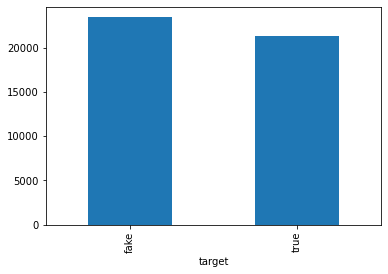

In [37]:
#Data exploration

# How many fake and real articles?
#groupby function is used to split the data into groups based on some criteria

# First grouping based on "target"
# Within each target we are grouping based on "text"

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


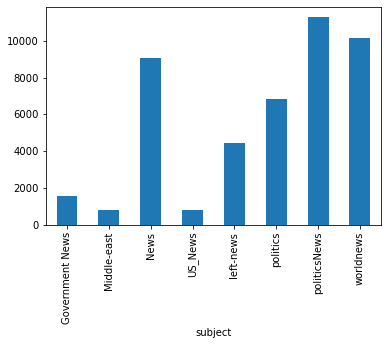

In [38]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


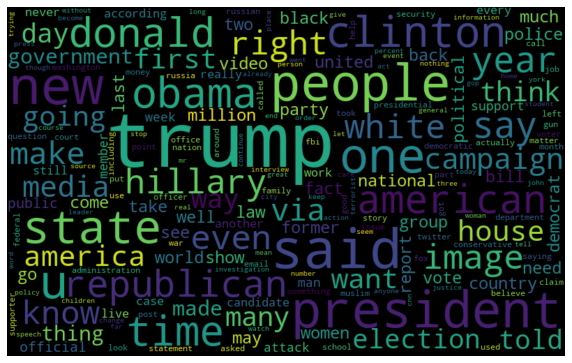

In [42]:
# Word cloud the fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
# Joining with empty separator
all_words = ' '.join([text for text in fake_data.text])

#Wordcloud is basically a visualization technique 
#to represent the frequency of words in a text where the size of the word represents its frequency
#Create and generate a word cloud imag
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
# Display the generated imag
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

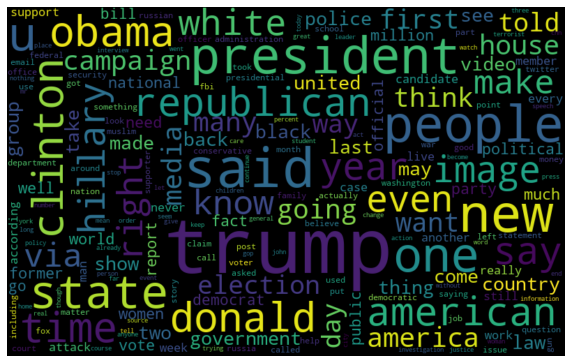

In [43]:
# Word cloud the true news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

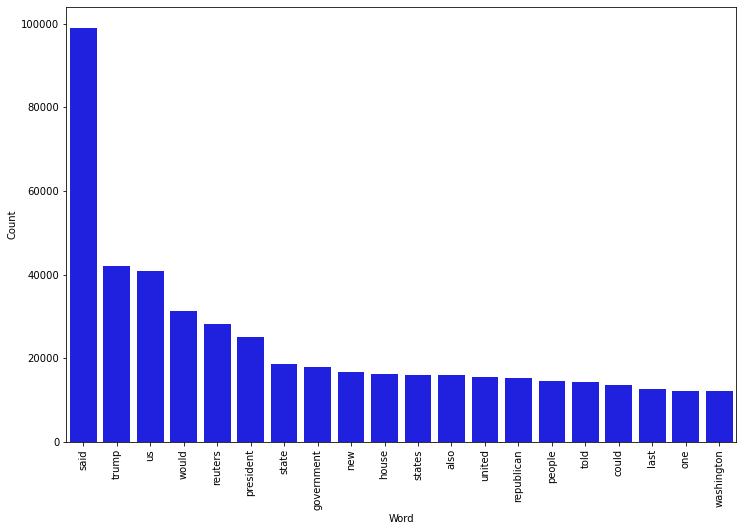

In [58]:
# Most frequent words counter   
from nltk import tokenize
#use the word_tokenize() method to split a sentence into tokens or words
#WhitespaceTokenizer:extract the tokens from string of words or sentences without whitespaces, new line and tabs
token_space = tokenize.WhitespaceTokenizer()

def counterWords(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    #FreqDist : gives the user the frequency distribution of all the words in the text
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()
    # Most frequent words in true news
counterWords(data[data["target"] == "true"], "text", 20)

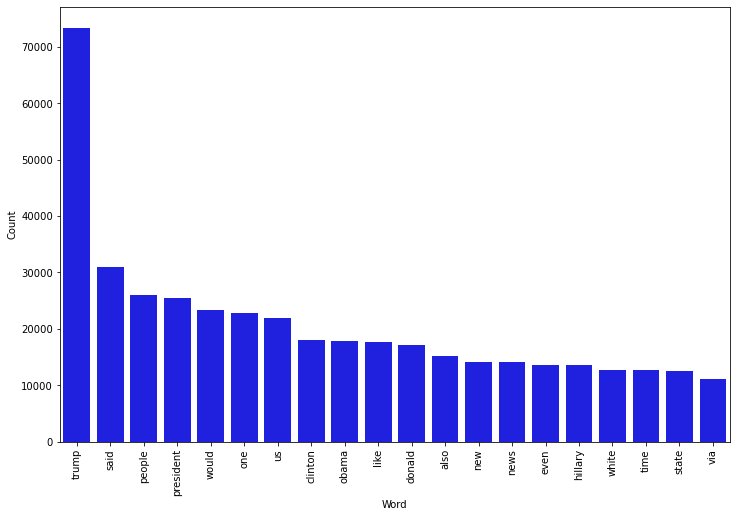

In [59]:
# Most frequent words in fake news
counterWords(data[data["target"] == "fake"], "text", 20)

In [60]:
#modeling
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, Without Normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [63]:
X_train.head()

36335    know trump supporters screaming brown people p...
12384    ottawa reuters united states sees urgent need ...
24419    segment last week tonight john oliver discusse...
24740    london reuters irish prime minister leo varadk...
27039    harare reuters zimbabwean president robert mug...
Name: text, dtype: object

In [64]:
y_train.head()

36335    fake
12384    true
24419    fake
24740    true
27039    true
Name: target, dtype: object

In [65]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.54%


Confusion Matrix, Without Normalization


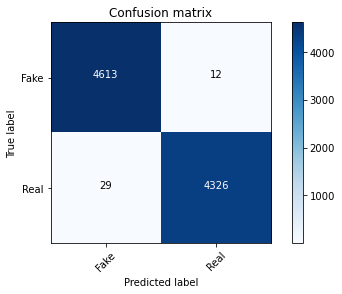

In [66]:
cm = metrics.confusion_matrix(y_test, prediction)
plotConfusionMatrix(cm, classes=['Fake', 'Real'])